In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [ ]:
import pandas as pd
filename = list(uploaded.keys())[1]

# Read the file using the filename
df = pd.read_csv(filename)
filename

'train (1).csv'

In [ ]:
df.shape

(1460, 81)

In [ ]:
df_cols_with_null=df.isnull().sum().sort_values(ascending=False)

In [ ]:
print(df_cols_with_null)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64


In [ ]:
# prompt: drop a row with name 'PoolQC','MiscFeature','Alley','Fence'

df_new = df.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1)


In [ ]:
df_new.shape

(1460, 77)

In [ ]:
df_new.isnull().sum().sort_values(ascending=False)

,0
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageYrBlt,81
...,...
BsmtUnfSF,0
TotalBsmtSF,0
MSSubClass,0
HeatingQC,0


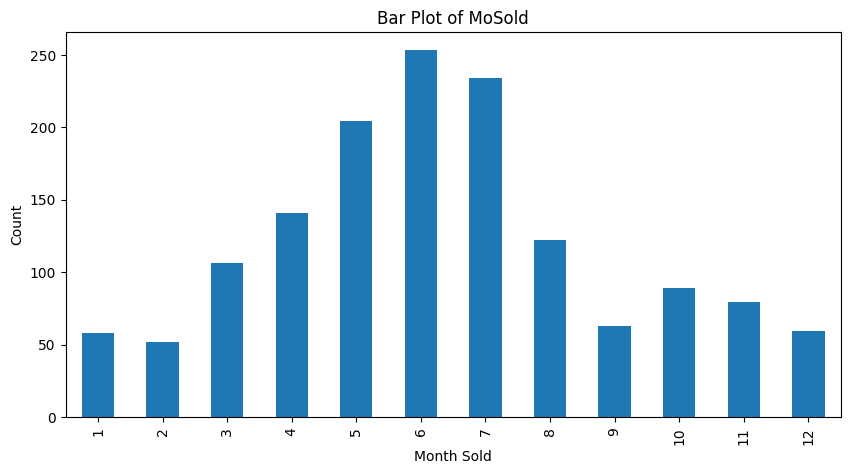

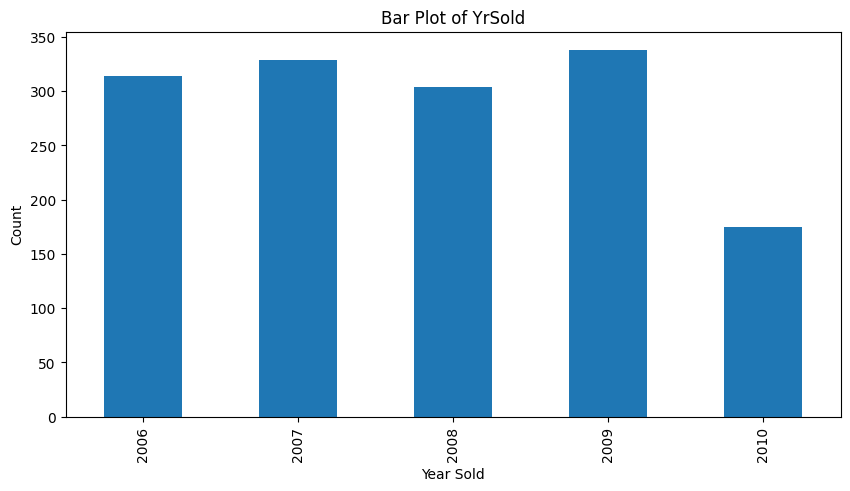

In [ ]:
# prompt: for the data df_new plot a bar plot for the feature MoSold and another bar plot for the feature YrSold

import matplotlib.pyplot as plt

# Bar plot for MoSold
plt.figure(figsize=(10, 5))
df_new['MoSold'].value_counts().sort_index().plot(kind='bar')
plt.title('Bar Plot of MoSold')
plt.xlabel('Month Sold')
plt.ylabel('Count')
plt.show()


# Bar plot for YrSold
plt.figure(figsize=(10, 5))
df_new['YrSold'].value_counts().sort_index().plot(kind='bar')
plt.title('Bar Plot of YrSold')
plt.xlabel('Year Sold')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
filename_test = list(uploaded.keys())[0]

# Read the file using the filename
df_test = pd.read_csv(filename_test)
filename_test

'test (1).csv'

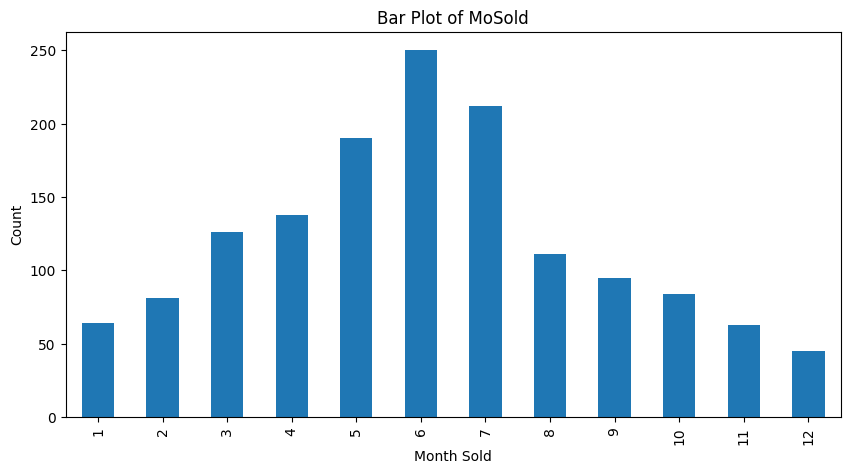

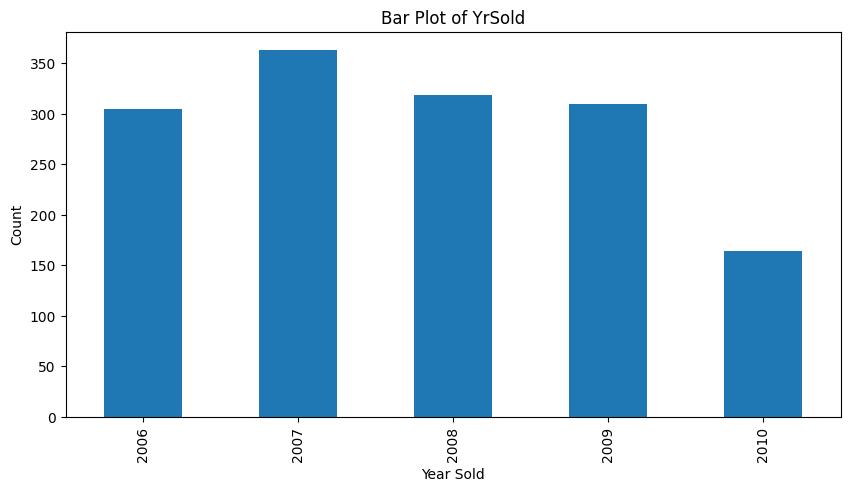

In [ ]:
# prompt: for the data df_new plot a bar plot for the feature MoSold and another bar plot for the feature YrSold

import matplotlib.pyplot as plt

# Bar plot for MoSold
plt.figure(figsize=(10, 5))
df_test['MoSold'].value_counts().sort_index().plot(kind='bar')
plt.title('Bar Plot of MoSold')
plt.xlabel('Month Sold')
plt.ylabel('Count')
plt.show()


# Bar plot for YrSold
plt.figure(figsize=(10, 5))
df_test['YrSold'].value_counts().sort_index().plot(kind='bar')
plt.title('Bar Plot of YrSold')
plt.xlabel('Year Sold')
plt.ylabel('Count')
plt.show()

In [ ]:
df_new=df_new.drop('YrSold' , axis=1)

In [ ]:
import numpy as np

In [ ]:
month_count=np.array(df_new['MoSold'].value_counts().sort_index())

In [ ]:
month_count=month_count/1460

In [ ]:
df_new.shape[0]

1460

In [ ]:
for i in range(df_new.shape[0]):
  # Check if the value is within the valid range for month_count and convert to int
  index = int(df_new['MoSold'][i]) - 1
  if 0 <= index < len(month_count):
    df_new['MoSold'][i] = month_count[index]
  else:
    # Handle the case where the index is out of bounds (e.g., print a warning or assign a default value)
    print(f"Warning: Invalid index {index} encountered at row {i}")
    df_new['MoSold'][i]=0

<ipython-input-171-81e9f08646d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['MoSold'][i] = month_count[index]
<ipython-input-171-81e9f08646d7>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.03561643835616438' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_new['MoSold'][i] = month_count[index]


In [ ]:
# prompt: check the null count in the row MoSold in df_new

df_new['MoSold'].isnull().sum()


0

In [ ]:
df_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,0.035616,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,0.139726,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,0.043151,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,0.035616,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,0.040411,WD,Normal,250000


In [ ]:
# prompt: normalize the data and for colums with categories count the no of occurances of certain attribute and normalize accordingly like assigning the sone value for those attributes dont do it for ID column and also if you find any NaN change it to 0

# Iterate through columns
for column in df_new.columns:
  if column in ['Id','SalePrice']:
    continue  # Skip the 'Id' column

  if df_new[column].dtype == object:  # Categorical column
    # Count occurrences of each category and normalize
    value_counts = df_new[column].value_counts(normalize=True)
    df_new[column] = df_new[column].map(value_counts).fillna(0)
  else:  # Numerical column
    # Replace NaN with 0
    df_new[column] = df_new[column].fillna(0)

    # Normalize the column (you can choose different normalization methods)
    if df_new[column].std() != 0:
      df_new[column] = (df_new[column] - df_new[column].mean()) / df_new[column].std()


df_new.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,1,0.073350,0.788356,0.212804,-0.207071,0.99589,0.633562,0.897945,0.999315,0.720548,...,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.484065,0.867808,0.820548,208500
1,2,-0.872264,0.788356,0.645526,-0.091855,0.99589,0.633562,0.897945,0.999315,0.032192,...,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.598517,0.867808,0.820548,181500
2,3,0.073350,0.788356,0.299349,0.073455,0.99589,0.331507,0.897945,0.999315,0.720548,...,-0.070337,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.333352,0.867808,0.820548,223500
3,4,0.309753,0.788356,0.068564,-0.096864,0.99589,0.331507,0.897945,0.999315,0.180137,...,-0.175988,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.484065,0.867808,0.069178,140000
4,5,0.073350,0.788356,0.760919,0.375020,0.99589,0.331507,0.897945,0.999315,0.032192,...,0.563567,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.388157,0.867808,0.820548,250000


In [ ]:
# prompt: do one hot encoding for the df_new and store it in df_new_onehot

import pandas as pd
df_new_onehot = pd.get_dummies(df_new,
                               columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'],
                               dummy_na=True)


In [ ]:
df_new_onehot.shape

(1460, 309)

In [ ]:
df_new_onehot.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,True,False,False,False,False,False,True,False,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,True,False,False,False,False,False,True,False,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,True,False,False,False,False,False,True,False,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,True,False,True,False,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
# prompt: normalise the rows whose values are not between 0 and1 except the id column AND saleprice column

from sklearn.preprocessing import MinMaxScaler

# Assuming 'Id' and 'SalePrice' are your column names
cols_to_normalize = df_new_onehot.select_dtypes(include=['number']).columns
cols_to_normalize = [col for col in cols_to_normalize if col not in ['Id', 'SalePrice']]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
df_new_onehot[cols_to_normalize] = scaler.fit_transform(df_new_onehot[cols_to_normalize])

# Verify that the values are now between 0 and 1
print(df_new_onehot[cols_to_normalize].describe())

        MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000  1460.000000  1460.000000  1460.000000   
mean      0.217043     0.167979     0.043080     0.566591     0.571918   
std       0.248827     0.083167     0.046653     0.153666     0.139100   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.130137     0.029229     0.444444     0.500000   
50%       0.176471     0.164384     0.038227     0.555556     0.500000   
75%       0.294118     0.202055     0.048150     0.666667     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean      0.719332      0.581096     0.064803     0.078604     0.031580  ...   
std       0.218862      0.344090     0.113166     0.080811     0.109443  ...   
min       0.0

In [ ]:
df_new_onehot.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,1,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,...,False,True,False,False,False,False,False,True,False,False
1,2,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,...,False,True,False,False,False,False,False,True,False,False
2,3,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,...,False,True,False,False,False,False,False,True,False,False
3,4,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,...,False,True,False,True,False,False,False,False,False,False
4,5,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
# prompt: create a lin regression for df_new_onehot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'SalePrice' is your target variable
X = df_new_onehot.drop('SalePrice', axis=1)
y = df_new_onehot['SalePrice']

# Convert non-numeric columns to numeric using one-hot encoding
X = pd.get_dummies(X)

# Replace NaN values with 0
X.fillna(0, inplace=True) # Added this line to replace NaN with 0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (you can use metrics like R-squared, MSE, etc.)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 874043515.7738795
R-squared: 0.88604871655199


In [ ]:
# prompt: create a random forest regression for df_new_onehot

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'SalePrice' is your target variable
X = df_new_onehot.drop('SalePrice', axis=1)
y = df_new_onehot['SalePrice']

# Convert non-numeric columns to numeric using one-hot encoding
X = pd.get_dummies(X)

# Replace NaN values with 0
X.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
model = RandomForestRegressor(random_state=42) # Changed model to RandomForestRegressor

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (you can use metrics like R-squared, MSE, etc.)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 854317623.9410095
R-squared: 0.8886204314047934


In [ ]:
# prompt: create a random forest regression for df_new_onehot

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'SalePrice' is your target variable
X = df_new.drop('SalePrice', axis=1)
y = df_new['SalePrice']

# Convert non-numeric columns to numeric using one-hot encoding
X = pd.get_dummies(X)

# Replace NaN values with 0
X.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
model = RandomForestRegressor(random_state=42) # Changed model to RandomForestRegressor

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (you can use metrics like R-squared, MSE, etc.)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 821216049.6499467
R-squared: 0.8929359681103961


In [ ]:
# prompt: import Kernel Ridge Regression  and predict

import pandas as pd
from sklearn.kernel_ridge import KernelRidge

# Assuming 'SalePrice' is your target variable
X = df_new.drop('SalePrice', axis=1)
y = df_new['SalePrice']

# Convert non-numeric columns to numeric using one-hot encoding
X = pd.get_dummies(X)

# Replace NaN values with 0
X.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Kernel Ridge Regression model
model12 = KernelRidge(alpha=1.0, kernel='linear')

# Train the model
model12.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model12.predict(X_test)

# Evaluate the model (you can use metrics like R-squared, MSE, etc.)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1169549947.8283913
R-squared: 0.8475227889613719


In [ ]:
# prompt: drop a row with name 'PoolQC','MiscFeature','Alley','Fence'

df_test = df_test.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1)


In [ ]:
df_test=df_test.drop('YrSold' , axis=1)

In [ ]:
month_count_test=np.array(df_test['MoSold'].value_counts().sort_index())

In [ ]:
month_count_test=month_count_test/1460

In [ ]:
for i in range(df_test.shape[0]):
  # Check if the value is within the valid range for month_count and convert to int
  index = int(df_test['MoSold'][i]) - 1
  if 0 <= index < len(month_count_test):
    df_test['MoSold'][i] = month_count_test[index]
  else:
    # Handle the case where the index is out of bounds (e.g., print a warning or assign a default value)
    print(f"Warning: Invalid index {index} encountered at row {i}")
    df_test['MoSold'][i]=0

<ipython-input-180-e040c6e5850f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['MoSold'][i] = month_count_test[index]
<ipython-input-180-e040c6e5850f>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.17123287671232876' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test['MoSold'][i] = month_count_test[index]


In [ ]:
# prompt: normalize the data and for colums with categories count the no of occurances of certain attribute and normalize accordingly like assigning the sone value for those attributes dont do it for ID column and also if you find any NaN change it to 0

# Iterate through columns
for column in df_test.columns:
  if column == 'Id':
    continue  # Skip the 'Id' column

  if df_test[column].dtype == object:  # Categorical column
    # Count occurrences of each category and normalize
    value_counts = df_test[column].value_counts(normalize=True)
    df_test[column] = df_test[column].map(value_counts).fillna(0)
  else:  # Numerical column
    # Replace NaN with 0
    df_test[column] = df_test[column].fillna(0)

    # Normalize the column (you can choose different normalization methods)
    if df_test[column].std() != 0:
      df_test[column] = (df_test[column] - df_test[column].mean()) / df_test[column].std()


df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition
0,1461,-0.874411,0.006873,0.684614,0.363804,0.995888,0.640164,0.898561,1.0,0.740918,...,0.366553,-0.701387,-0.360615,-0.088796,1.818336,-0.057207,-0.092212,1.466747,0.862826,0.825223
1,1462,-0.874411,0.765636,0.715606,0.897553,0.995888,0.331734,0.898561,1.0,0.169979,...,2.347063,-0.178765,-0.360615,-0.088796,-0.301440,-0.057207,19.723675,1.466747,0.862826,0.825223
2,1463,0.061330,0.765636,0.498660,0.809368,0.995888,0.331734,0.898561,1.0,0.740918,...,0.930176,-0.207799,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,-0.412120,0.862826,0.825223
3,1464,0.061330,0.765636,0.622629,0.032053,0.995888,0.331734,0.898561,1.0,0.740918,...,2.088735,-0.178765,-0.360615,-0.088796,-0.301440,-0.057207,-0.092212,1.466747,0.862826,0.825223
4,1465,1.464941,0.765636,-0.462102,-0.971475,0.995888,0.331734,0.047978,1.0,0.740918,...,-0.729382,0.489031,-0.360615,-0.088796,2.242291,-0.057207,-0.092212,-1.351553,0.862826,0.825223


In [ ]:
# prompt: do one hot encoding for the df_new and store it in df_new_onehot

import pandas as pd
df_test_onehot = pd.get_dummies(df_test,
                               columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'],
                               dummy_na=True)


In [ ]:
# prompt: normalise the rows whose values are not between 0 and1 except the id column AND saleprice column

from sklearn.preprocessing import MinMaxScaler

# Assuming 'Id' and 'SalePrice' are your column names
cols_to_normalize = df_test_onehot.select_dtypes(include=['number']).columns
cols_to_normalize = [col for col in cols_to_normalize if col not in ['Id']]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
df_test_onehot[cols_to_normalize] = scaler.fit_transform(df_test_onehot[cols_to_normalize])

# Verify that the values are now between 0 and 1
print(df_test_onehot[cols_to_normalize].describe())

        MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000  1459.000000  1459.000000  1459.000000   
mean      0.219873     0.265812     0.151445     0.564313     0.569225   
std       0.251452     0.125010     0.089888     0.159646     0.139217   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.206704     0.107401     0.444444     0.500000   
50%       0.176471     0.256983     0.143824     0.555556     0.500000   
75%       0.294118     0.329609     0.182251     0.666667     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1459.000000   1459.000000  1444.000000  1458.000000  1458.000000  ...   
mean      0.705021      0.561046     0.078069     0.109527     0.034482  ...   
std       0.231985      0.352174     0.137694     0.113533     0.115828  ...   
min       0.0

In [ ]:
df_test_onehot.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,1461,0.000000,0.329609,0.184147,0.444444,0.625,0.625954,0.183333,0.000000,0.116708,...,False,True,False,False,False,False,False,True,False,False
1,1462,0.000000,0.335196,0.232124,0.555556,0.625,0.603053,0.133333,0.083721,0.230175,...,False,True,False,False,False,False,False,True,False,False
2,1463,0.235294,0.296089,0.224197,0.444444,0.500,0.900763,0.800000,0.000000,0.197257,...,False,True,False,False,False,False,False,True,False,False
3,1464,0.235294,0.318436,0.154326,0.555556,0.625,0.908397,0.800000,0.015504,0.150125,...,False,True,False,False,False,False,False,True,False,False
4,1465,0.588235,0.122905,0.064121,0.777778,0.500,0.862595,0.700000,0.000000,0.065586,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
X=df_test
X = pd.get_dummies(X)

# Replace NaN values with 0
X.fillna(0, inplace=True)

model4.predict(X)

array([127173.94888239, 164731.45681482, 176517.8986697 , ...,
       181097.29661965, 121389.17028034, 241720.46120924])

In [ ]:
X.shape

(1459, 75)

In [ ]:
# prompt: create a csv file with 2 columns , ID from df_test and the predected values

import pandas as pd

# Assuming you have 'df_test' and 'model' defined
# and 'model.predict(X)' gives the predicted values

# Create a DataFrame with 'Id' and 'SalePrice' columns
submission_df = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': model4.predict(X)})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_GBM.csv', index=False)

print("Submission CSV file created: submission_xg.csv")


Submission CSV file created: submission_xg.csv


In [ ]:
# prompt: download the submission.csv

from google.colab import files
files.download('submission_GBM.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>